In [4]:
import sys
import numpy
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import griddata
np.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=sys.maxsize)

Interpolation 

### 1D

Here we have a have an example of using interpolation in one dimension. 

#### 5.1 
Using the code at the bottom, experiment with changing how many points you have to interpolate (as a percentage of the original image in `sample_amount`) from, and which interpolation method (nearest, linear or cubic in `mode`)


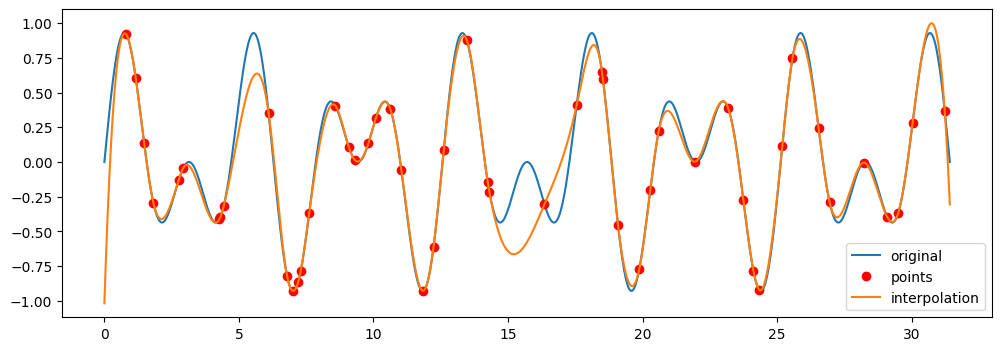

In [26]:
#####################################################
def func(x):
    x = np.array(x)
    return np.sin(2*x)*np.cos(x/2)

def plot(sample_amount,mode):
    #Get points
    num_points = 1000
    total_x = np.linspace(0,10*np.pi,num_points)
    known_x = total_x.copy()
    total_points = func(total_x)
    np.random.shuffle(known_x)
    sample_amount = int(num_points*(sample_amount)/100)
    known_x = sorted(known_x[:sample_amount])
    known_points = func(known_x)
    #Interpolate
    f = interpolate.interp1d(known_x, known_points,kind=mode,fill_value="extrapolate")
    ynew = f(total_x)
    #Plot
    fig, ax = plt.subplots(figsize = (12,4))
    ax.plot(total_x,total_points,label="original")
    ax.plot(known_x,known_points,"ro",label="points")
    ax.plot(total_x, ynew,label="interpolation")
    ax.legend()


#####################################################    

   
#Change the amount of the original sample available, and interpolation method

#How many points to interpolate from? (percentage of original function)
sample_amount = 5
#What interpolation method? ("nearest", "linear","cubic")
mode = "cubic"

plot(sample_amount, mode)

## 2D

Now we're going to investigate how the same process works in 2 Dimensions with an image. 

#### 5.2

As above, you can pick how many points you have to interpolate with (`sample_amount`), and what interpolation function to use (`mode`). 

What we show you is the original image, the same points that we know the values of when interpolating and then the result of the interpolation 

In [8]:
im = np.array(Image.open("images/smol_cat.jpg").convert('L'))
im = np.flip(im,axis=0)

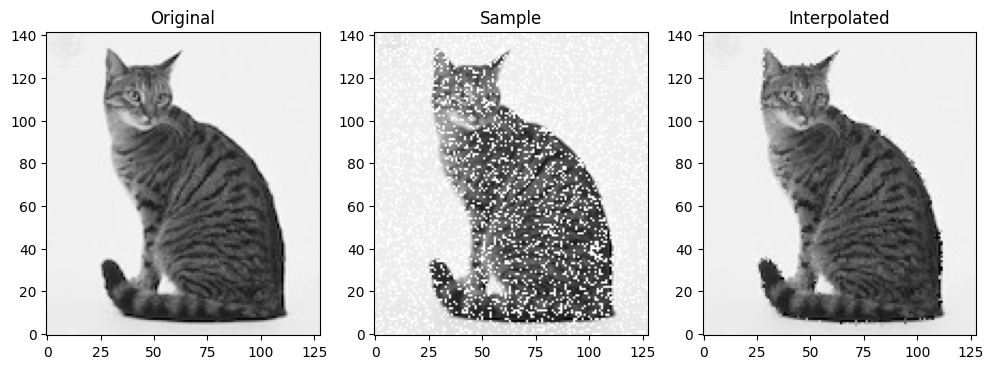

In [32]:
#####################################################

def plot(sample_amount,mode):
    h, w = im.shape
    #Get sample
    pts = np.arange(h*w)
    x,y = np.mgrid[0:w, 0:h]
    np.random.shuffle(pts)
    sample_amount = int(len(pts)*(sample_amount)/100)
    sampled_pts = sorted(pts[:sample_amount])
    sampled_coords = [i for i in zip(x.ravel()[sampled_pts],y.ravel()[sampled_pts])]
    sampled_values = np.array([im[i[1],i[0]] for i in sampled_coords])
    sample = np.ones((h,w))*255
    for i,c in enumerate(sampled_coords):
        sample[c[1],c[0]] = sampled_values[i]
    #Interpolate
    tx,ty = np.mgrid[0:h, 0:w]
    interpolated = griddata(sampled_coords, sampled_values, (ty,tx), method=mode)
    #Plot
    fig,ax = plt.subplots(ncols = 3,figsize=(12,6))
    ax[0].imshow(im, origin = "lower", cmap="gray")
    ax[0].set_title("Original")
    ax[1].imshow(sample, origin = "lower", cmap="gray")
    ax[1].set_title("Sample")
    ax[2].imshow(interpolated, origin = "lower", cmap="gray")
    ax[2].set_title("Interpolated")

#####################################################

#Change the amount of the original sample available, and interpolation method

#How many points to interpolate from?(percentage of pixels in image)
sample_amount = 80
#What interpolation method? ("nearest", "linear","cubic")
mode = "nearest"

plot(sample_amount, mode)

In [21]:
print(sample)

NameError: name 'sample' is not defined